Epoch [1/12] - Train Loss: 0.6425, Train Accuracy: 62.74%, Val Loss: 0.6205, Val Accuracy: 64.28%
Epoch [2/12] - Train Loss: 0.5772, Train Accuracy: 69.43%, Val Loss: 0.5633, Val Accuracy: 70.93%
Epoch [3/12] - Train Loss: 0.5287, Train Accuracy: 73.57%, Val Loss: 0.5272, Val Accuracy: 74.73%
Epoch [4/12] - Train Loss: 0.4872, Train Accuracy: 76.51%, Val Loss: 0.5004, Val Accuracy: 75.69%
Epoch [5/12] - Train Loss: 0.4472, Train Accuracy: 79.13%, Val Loss: 0.4952, Val Accuracy: 76.05%
Epoch [6/12] - Train Loss: 0.4174, Train Accuracy: 81.03%, Val Loss: 0.4582, Val Accuracy: 78.99%
Epoch [7/12] - Train Loss: 0.3702, Train Accuracy: 83.72%, Val Loss: 0.4422, Val Accuracy: 80.05%
Epoch [8/12] - Train Loss: 0.3284, Train Accuracy: 85.98%, Val Loss: 0.4630, Val Accuracy: 79.35%
Epoch [9/12] - Train Loss: 0.2937, Train Accuracy: 87.43%, Val Loss: 0.4533, Val Accuracy: 79.95%
Epoch [10/12] - Train Loss: 0.2438, Train Accuracy: 90.06%, Val Loss: 0.4435, Val Accuracy: 80.71%
Epoch [11/12] - Tra

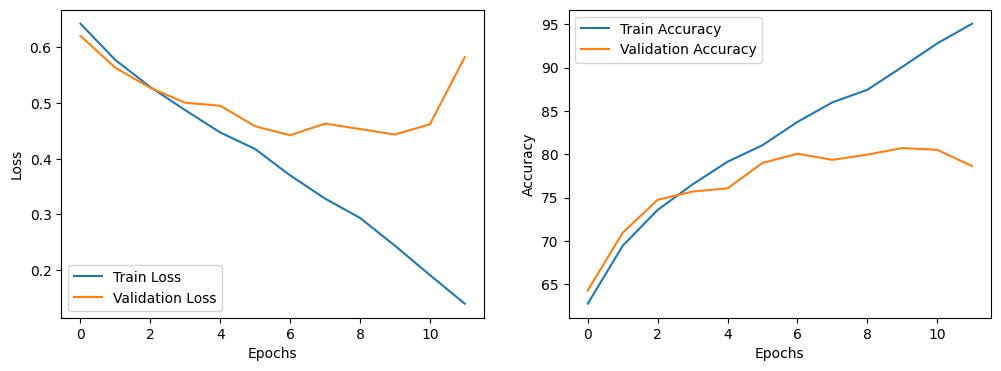

In [23]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

# 检查GPU是否可用
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

# 数据集目录
data_dir = "C:/Users/1/Desktop/猫狗分类数据集/train"

# 定义数据预处理和增强
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载数据集
dataset = ImageFolder(root=data_dir, transform=transform)

# 划分数据集为训练集和验证集
total_samples = len(dataset)
val_split = 0.3
val_size = int(val_split * total_samples)
train_size = total_samples - val_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# 创建数据加载器
batch_size = 48
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 自定义复杂神经网络
class CustomComplexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(256 * 28 * 28, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 2)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x

# 创建自定义神经网络模型
complex_model = CustomComplexNet()
complex_model = complex_model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.001, momentum=0.9)

# 训练模型
num_epochs = 12
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    complex_model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = complex_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct_train / total_train
    train_accuracy_history.append(train_accuracy)
    train_loss_history.append(train_loss / len(train_loader))

    complex_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = complex_model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct_val / total_val
    val_accuracy_history.append(val_accuracy)
    val_loss_history.append(val_loss / len(val_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss_history[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# 可视化训练过程
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# 保存模型
torch.save(model.state_dict(), 'custom_cat_dog_classifier.pth')